# Feature Scaling  

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing. 

Working: 
Given a data-set with features- Age, Salary, BHK Apartment with the data size of 5000 people, each having these independent data features. 

Each data point is labeled as: 

Class1- YES (means with the given Age, Salary, BHK Apartment feature value one can buy the property).

Class2- NO (means with the given Age, Salary, BHK Apartment feature value one can’t buy the property).


## Prediction of the class of new data points:

 
The model calculates the distance of this data point from the centroid of each class group. Finally, this data point will belong to that class, which will have a minimum centroid distance from it. 
The distance can be calculated between centroid and data point using these methods- 

#### *Euclidean Distance*:

It is the square root of the sum of squares of differences between the coordinates (feature values – 
Age, Salary, BHK Apartment) of data point and centroid of each class. 

```d(x, y)=\sqrt[r]{\sum_{k=1}^{n}\left(x_{k}-y_{k}\right)^{r}} ``` 
where x is Data Point value, y is Centroid value and k is no. of feature values.

#### _Manhattan Distance:_

It is calculated as the sum of absolute differences between the coordinates (feature values) of data point and centroid of each class. 

```d(x, y)=\sum_{k=1}^{n}\left|x_{k}-y_{k}\right```
 
#### *Minkowski Distance:* 

It is a generalization of the above two methods. As shown in the figure, different values can be used for finding r.


# Why Feature Scaling?

The machine learning models assign weights to the independent variables according to their data points and conclusions for output.

In that case, if the difference between the data points is high, the model will need to provide more significant weight to the farther points, and in the final results, the model with a large weight value assigned to undeserving features is often unstable.

- Feature scaling, also known as feature normalization, ensures that all features are on a comparable scale with similar ranges, avoiding dominance of larger scale features in the learning process.
- Many machine learning techniques, including *gradient descent-based algorithms, k-nearest neighbors, and support vector machines*, benefit from scaled features as they perform better and converge faster.
- Scaling helps prevent numerical instability caused by significant scale disparities between features, avoiding issues like numerical overflow or underflow in distance calculations or matrix operations.
- By scaling features, biases in the learning process are removed, and each characteristic is given equal consideration, leading to more balanced and fair contributions from all features to model predictions.

# Absolute Maximum Scaling

This method of scaling requires two-step:

We should first select the maximum absolute value out of all the entries of a particular measure.
Then after this, we divide each entry of the column by this maximum value.

``` X_{\rm {scaled }}=\frac{X_{i}-\rm{max}\left(|X|\right)}{\rm{max}\left(|X|\right)}  ```

In [6]:
import pandas as pd
df = pd.read_csv('SampleFile.csv')
print(df.head())

   LotArea  MSSubClass
0     8450          60
1     9600          20
2    11250          60
3     9550          70
4    14260          60


In [7]:
import numpy as np
max_vals = np.max(np.abs(df))
max_vals

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


LotArea       215245
MSSubClass       190
dtype: int64

In [8]:
print((df - max_vals) / max_vals)

       LotArea  MSSubClass
0    -0.960742   -0.684211
1    -0.955400   -0.894737
2    -0.947734   -0.684211
3    -0.955632   -0.631579
4    -0.933750   -0.684211
...        ...         ...
1455 -0.963219   -0.684211
1456 -0.938791   -0.894737
1457 -0.957992   -0.631579
1458 -0.954856   -0.894737
1459 -0.953834   -0.894737

[1460 rows x 2 columns]


# Min Max Scaling

This method of scaling requires below two-step:

First, we are supposed to find the minimum and the maximum value of the column.
Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.

```X_{\rm {scaled }}=\frac{X_{i}-X_{\text {min}}}{X_{\rm{max}} - X_{\rm{min}}} ```

As we are using the maximum and the minimum value this method is also prone to outliers but the range in which the data will range after performing the above two steps is between 0 to 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
scaled_df.head()


,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294


# Normalization


This method is more or less the same as the previous method but here instead of the minimum value, we subtract each entry by the mean value of the whole data and then divide the results by the difference between the minimum and the maximum value.
```
X_{\rm {scaled }}=\frac{X_{i}-X_{\text {mean}}}{X_{\rm{max}} - X_{\rm{min}}}  ```

In [11]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)
print(scaled_df.head())


    LotArea  MSSubClass
0  0.999975    0.007100
1  0.999998    0.002083
2  0.999986    0.005333
3  0.999973    0.007330
4  0.999991    0.004208


# Standardization


This method of scaling is basically based on the central tendencies and variance of the data. 

First, we should calculate the mean and standard deviation of the data we would like to normalize.
Then we are supposed to subtract the mean value from each entry and then divide the result by the standard deviation

```X_{\rm {scaled }}=\frac{X_{i}-X_{\text {mean }}}{\sigma}  ```

In [12]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0 -0.207142    0.073375
1 -0.091886   -0.872563
2  0.073480    0.073375
3 -0.096897    0.309859
4  0.375148    0.073375


# Robust Scaling

In this method of scaling, we use two main statistical measures of the data.

Median
Inter-Quartile Range
After calculating these two values we are supposed to subtract the median from each entry and then divide the result by the interquartile range.

```X_{\rm {scaled }}=\frac{X_{i}-X_{\text {median }}}{IQR}  ```

In [13]:
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

    LotArea  MSSubClass
0 -0.254076         0.2
1  0.030015        -0.6
2  0.437624         0.2
3  0.017663         0.4
4  1.181201         0.2


# Data  Normalization using Pandas

In [16]:
#Creating data
# importing packages
import pandas as pd
  
# create data
df = pd.DataFrame([
                   [180000, 110, 18.9, 1400], 
                   [360000, 905, 23.4, 1800], 
                   [230000, 230, 14.0, 1300], 
                   [60000, 450, 13.5, 1500]], 
    
                   columns=['Col A', 'Col B',
                            'Col C', 'Col D'])
  
# view data
display(df)

,Col A,Col B,Col C,Col D
0,180000,110,18.9,1400
1,360000,905,23.4,1800
2,230000,230,14.0,1300
3,60000,450,13.5,1500


<AxesSubplot: >

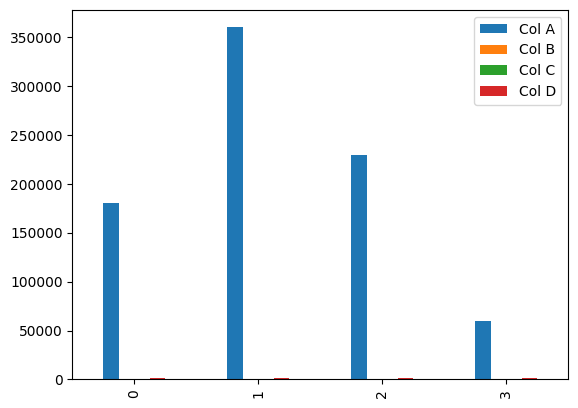

In [17]:
import matplotlib.pyplot as plt
df.plot(kind = 'bar')

In [18]:
# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,Col A,Col B,Col C,Col D
0,0.500000,0.121547,0.807692,0.777778
1,1.000000,1.000000,1.000000,1.000000
2,0.638889,0.254144,0.598291,0.722222
3,0.166667,0.497238,0.576923,0.833333


<AxesSubplot: >

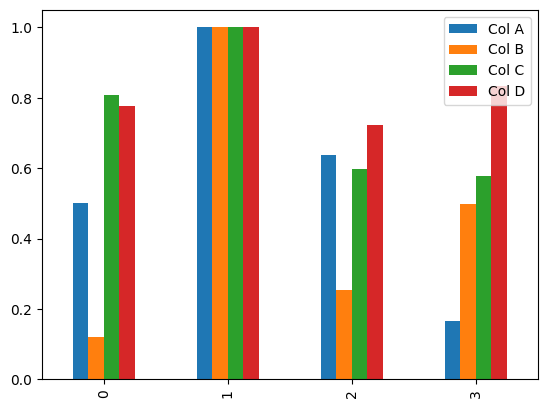

In [19]:
import matplotlib.pyplot as plt
df_max_scaled.plot(kind = 'bar')